In [4]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt

In [180]:
def simulate_gradient_descent(X_projected, Y, w_init, num_steps = 1000, alpha = 0.01):
    
    """
    :param X_projected: original X, projected to the nullspace of a linear calssifier
    :param P: a dxd projection matrix to dimensionality d-1
    :param w_init: the initial value of w for the SGD
    :parm num_steps: number of SGD steps
    :parma alpha: learning rate
    """
    
    w = w_init.copy()
    
    for i in range(num_steps):
        
        x = random.choice(X_projected)
        w = w - alpha * x # SGD update
        
    return w
        

def plot_orthogonality_vs_number_of_sgd_steps(X, Y, w1, P, initialize_by_zero_vector, dim, do_sgd_func):
    """
    :param X data matrix
    :param w1 a random direction in the dim-dimensional space
    :param P a projection matrix to w1's nullsapce
    :param initialize_by_zero_vector: bool, whether to initialize w2 by the zero vector
    :param dim dimensionality 
    :param do_sgd_func a function that runs SGD
    """
    
    # project X with P
    X_projected = P.dot(X.T).T
    
    # init w2
    
    if initialize_by_zero_vector:
        w2_init = np.zeros((1,dim))
    else:
        w2_init = np.random.rand(1, dim) - 0.5
    
    dot_product_results = [] # will store the result of w1.dot(w2) 
    num_sgd_steps = range(1,10000,250)
    
    for num_steps in num_sgd_steps:
        
        # run SGD for num_steps to find w2
        w2 = do_sgd_func(X_projected, Y, w2_init, num_steps, alpha = 1)
        dot_product_results.append(w2.dot(w1.T).item())
    
    plt.plot(num_sgd_steps, dot_product_results)
    plt.xlabel("Number of SGD steps")
    plt.ylabel("w1.dot(w2)")
    plt.ylim([-0.5, 0.5])
    plt.title("orthogonality vs. # SGD steps, initialized_by_zero_vector ={}".format(initialize_by_zero_vector))
    plt.show()
    print(dot_product_results)

## Experiment 1 - simualte SGD with zero initialization

In [232]:
dim = 100
num_points = 5000

w1 = np.random.rand(1, dim) - 0.5 # initialize the first classifier randomly
w1 /= np.linalg.norm(w1)

X = np.random.rand(num_points, dim)
P = np.eye(dim) - w1.T.dot(w1)
assert np.allclose(P.dot(P) - P, 0.0)

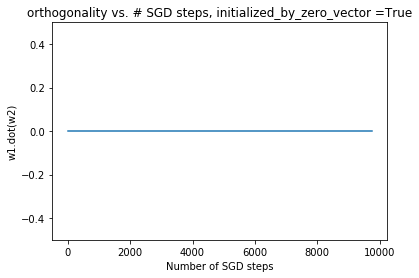

[-1.1102230246251565e-16, -5.684341886080802e-14, -1.7053025658242404e-13, -3.410605131648481e-13, -5.684341886080801e-13, -1.1368683772161603e-13, 4.547473508864641e-13, -1.2505552149377763e-12, 2.5011104298755527e-12, 3.410605131648481e-12, -1.1368683772161603e-12, -2.2737367544323206e-13, 3.183231456205249e-12, -2.2737367544323206e-13, -9.094947017729282e-13, -2.0463630789890885e-12, -3.410605131648481e-12, 2.2737367544323206e-13, -1.8189894035458565e-12, -3.183231456205249e-12, 1.8189894035458565e-12, 5.002220859751105e-12, -1.3642420526593924e-12, 7.275957614183426e-12, -1.77351466845721e-11, -5.9117155615240335e-12, -1.3642420526593924e-12, 5.002220859751105e-12, 1.4551915228366852e-11, 6.366462912410498e-12, -1.3642420526593924e-12, 7.275957614183426e-12, 1.9554136088117957e-11, -9.549694368615746e-12, 1.77351466845721e-11, 1.5006662579253316e-11, 5.9117155615240335e-12, -7.275957614183426e-12, 5.4569682106375694e-12, -1.1823431123048067e-11]


In [183]:
plot_orthogonality_vs_number_of_sgd_steps(X, None, w1, P, initialize_by_zero_vector = True, dim = dim,
                                          do_sgd_func = simulate_gradient_descent)

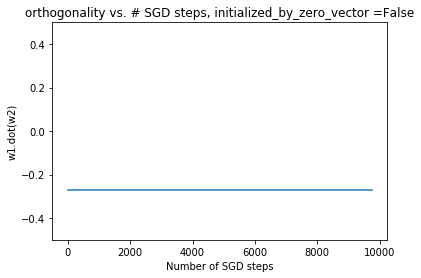

[-0.27309675333504846, -0.2730967533350679, -0.27309675333501104, -0.27309675333543737, -0.2730967533350963, -0.27309675333435735, -0.2730967533346984, -0.2730967533354942, -0.27309675333253836, -0.2730967533336752, -0.27309675333526684, -0.27309675333617633, -0.27309675333526684, -0.2730967533314015, -0.27309675333685846, -0.2730967533366311, -0.2730967533382227, -0.2730967533329931, -0.2730967533432249, -0.2730967533375406, -0.2730967533398143, -0.27309675333253836, -0.2730967533329931, -0.27309675333845007, -0.27309675333253836, -0.2730967533329931, -0.2730967533302646, -0.27309675334709027, -0.2730967533270814, -0.27309675333935957, -0.2730967533261719, -0.2730967533234434, -0.2730967533293551, -0.2730967533293551, -0.27309675331889594, -0.2730967533070725, -0.2730967533416333, -0.2730967533416333, -0.2730967533243529, -0.27309675333162886]


In [184]:
plot_orthogonality_vs_number_of_sgd_steps(X, None, w1, P, initialize_by_zero_vector = False, dim = dim,
                                          do_sgd_func = simulate_gradient_descent)

## Experiment 2 - Logisitc Regression

In [236]:
dim = 30
num_points = 2000
X = np.random.rand(num_points, dim) - 0.5
noise = 0.01 * (np.random.rand(*X.shape) - 0.5)
w1 = np.random.rand(1, dim) - 0.5
w1 /= np.linalg.norm(w1)
P = np.eye(dim) - w1.T.dot(w1)
assert np.allclose(P.dot(P) - P, 0.0)
Y = np.sum(3*X - 1.5 + noise, axis = 1) < 0 # yi =1 iff sum(3x_i - 1.5) < 1 

In [237]:
def sigmoid(x):
    
    return 1./(1 + np.e**(-x))

def do_sgd_for_logistic_regression(X_projected, Y, w_init, num_steps = 1000, alpha = 0.01):
    
    """
    :param X_projected: original X, projected to the nullspace of a linear calssifier
    :param P: a dxd projection matrix to dimensionality d-1
    :param w_init: the initial value of w for the SGD
    :parm num_steps: number of SGD steps
    :parma alpha: learning rate
    """
    
    w = w_init.copy()
    
    for i in range(num_steps):
        
        j = random.choice(range(len(X_projected)))
        x,y = X_projected[j], Y[j]
        y_hat = sigmoid(w.dot(x))
        x = random.choice(X_projected)
        w = w + alpha * (y-y_hat) * x # SGD update
        
    return w

[0.14393236]


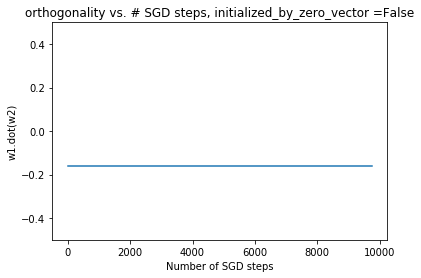

[-0.16277863397056, -0.1627786339705617, -0.1627786339705638, -0.16277863397055614, -0.1627786339705568, -0.16277863397055548, -0.16277863397056436, -0.16277863397058034, -0.16277863397057502, -0.16277863397052306, -0.16277863397057146, -0.1627786339705437, -0.16277863397058256, -0.16277863397057324, -0.16277863397062653, -0.1627786339706443, -0.16277863397053505, -0.1627786339705546, -0.16277863397050663, -0.16277863397052528, -0.1627786339705759, -0.16277863397055725, -0.1627786339705075, -0.16277863397047554, -0.16277863397066117, -0.16277863397054482, -0.16277863397053505, -0.16277863397058123, -0.16277863397050396, -0.16277863397057857, -0.16277863397055548, -0.1627786339705004, -0.16277863397054304, -0.16277863397046133, -0.1627786339703432, -0.1627786339706141, -0.16277863397051107, -0.16277863397053238, -0.16277863397061232, -0.16277863397052528]


In [248]:
w_init = np.random.rand(dim) - 0.5
w2 = do_sgd_for_logistic_regression(P.dot(X.T).T, Y, w_init, num_steps = 10000)
plot_orthogonality_vs_number_of_sgd_steps(X, Y, w1, P, initialize_by_zero_vector = False, dim = dim,
                                          do_sgd_func = do_sgd_for_logistic_regression)

In [210]:
w1.shape

(1, 30)

In [233]:
dim = 1000
w = np.random.rand(1, dim) - 0.5
w /= np.linalg.norm(w)
p = np.eye(dim) - w.T.dot(w)
p.dot(p) - p

array([[ 1.11022302e-16, -3.68628739e-18, -1.08420217e-19, ...,
        -8.67361738e-19,  1.62630326e-19,  2.16840434e-19],
       [-3.68628739e-18,  6.66133815e-16,  5.63785130e-18, ...,
        -1.30104261e-18, -2.16840434e-19, -2.16840434e-19],
       [-1.08420217e-19,  5.63785130e-18,  0.00000000e+00, ...,
         0.00000000e+00,  6.50521303e-19,  3.25260652e-19],
       ...,
       [-8.67361738e-19, -1.30104261e-18,  0.00000000e+00, ...,
         0.00000000e+00, -1.08420217e-19, -1.08420217e-19],
       [ 1.62630326e-19, -2.16840434e-19,  6.50521303e-19, ...,
        -1.08420217e-19,  0.00000000e+00,  5.42101086e-20],
       [ 2.16840434e-19, -2.16840434e-19,  3.25260652e-19, ...,
        -1.08420217e-19,  5.42101086e-20,  0.00000000e+00]])

In [231]:
np.eye(1000) - w.T.dot(w)

array([[ 0.9581911 , -0.01030005, -0.01961775, ..., -0.02108107,
        -0.06617038,  0.06715876],
       [-0.01030005,  0.99746248, -0.00483303, ..., -0.00519354,
        -0.01630175,  0.01654525],
       [-0.01961775, -0.00483303,  0.99079488, ..., -0.00989175,
        -0.03104875,  0.03151252],
       ...,
       [-0.02108107, -0.00519354, -0.00989175, ...,  0.98937041,
        -0.03336473,  0.03386309],
       [-0.06617038, -0.01630175, -0.03104875, ..., -0.03336473,
         0.89527304,  0.10629125],
       [ 0.06715876,  0.01654525,  0.03151252, ...,  0.03386309,
         0.10629125,  0.89212109]])

In [222]:
 np.eye(dim).shape

(30, 30)

In [223]:
p

array([[ 0.751486  ,  0.12675639,  0.18739248,  0.02416376,  0.02646068,
         0.16754062,  0.09472155,  0.01643354,  0.1864847 , -0.1937892 ,
         0.17635414, -0.14546516, -0.07806891, -0.10549904, -0.05528724,
        -0.18345914,  0.14275012,  0.0337639 ,  0.22595749,  0.04715236,
         0.24912254,  0.15633495,  0.03385572, -0.02273282, -0.18465344,
        -0.19523811, -0.09213035, -0.136215  , -0.14878495, -0.17047768],
       [ 0.12675639,  0.93534698, -0.09558091, -0.0123249 , -0.01349646,
        -0.08545532, -0.04831342, -0.00838205, -0.09511789,  0.0988436 ,
        -0.08995072,  0.07419557,  0.03981962,  0.05381056,  0.02819966,
         0.09357468, -0.07281074, -0.01722153, -0.11525127, -0.02405041,
        -0.12706678, -0.07973979, -0.01726836,  0.01159504,  0.09418384,
         0.09958263,  0.04699176,  0.06947746,  0.07588886,  0.08695339],
       [ 0.18739248, -0.09558091,  0.85869633, -0.01822073, -0.01995273,
        -0.12633434, -0.07142497, -0.01239174, -0